In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv("monthly_FRED-MD_2024-12.csv")
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [17]:
import arch
data["DailyReturn"] = np.log(data["S&P 500"][1:]).diff()
model = arch.arch_model(data["DailyReturn"][2:]*1000, vol='Garch', p=1, q=1)
mod_fit = model.fit()
data['volatility'] = mod_fit.conditional_volatility
data.drop(columns=["DailyReturn"], inplace=True)
data.head()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4546.080845723243
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3932.8741920510774
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6632.001755369203
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3915.570639393447
Iteration:      5,   Func. Count:     31,   Neg. LLF: 3915.568866433132
Iteration:      6,   Func. Count:     36,   Neg. LLF: 3915.5682568462266
Iteration:      7,   Func. Count:     41,   Neg. LLF: 3915.567799162076
Iteration:      8,   Func. Count:     46,   Neg. LLF: 3915.565072562486
Iteration:      9,   Func. Count:     51,   Neg. LLF: 3915.5595507596395
Iteration:     10,   Func. Count:     56,   Neg. LLF: 3915.5446802096812
Iteration:     11,   Func. Count:     61,   Neg. LLF: 3915.5133525998654
Iteration:     12,   Func. Count:     66,   Neg. LLF: 3915.4551330877675
Iteration:     13,   Func. Count:     71,   Neg. LLF: 3915.3831919375416
Iteration:     14,   Func. Count:     76,   Neg. LLF: 391

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,volatility
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0,NaN
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,...,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,...,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN,27.870022
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,...,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN,28.441518
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,...,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN,28.315402


In [18]:
# check multicollinearity
data.iloc[1:,1:].corr()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,volatility
RPI,1.000000,0.998100,0.997088,0.990796,0.986971,0.956460,0.919602,0.928113,0.887640,0.930419,...,0.993189,0.993478,0.992981,0.991824,-0.151609,0.960993,0.950767,0.945383,0.114572,0.057082
W875RX1,0.998100,1.000000,0.998453,0.995544,0.984424,0.967736,0.934738,0.942239,0.904386,0.944724,...,0.994001,0.993500,0.992325,0.992902,-0.128800,0.958504,0.954069,0.934131,0.114898,0.044995
DPCERA3M086SBEA,0.997088,0.998453,1.000000,0.994156,0.987924,0.963674,0.928493,0.936886,0.895962,0.938988,...,0.994689,0.993845,0.992316,0.992811,-0.150264,0.966727,0.962942,0.940598,0.099798,0.037368
CMRMTSPLx,0.990796,0.995544,0.994156,1.000000,0.971762,0.984006,0.957334,0.963266,0.929558,0.966653,...,0.987560,0.984474,0.981261,0.986056,-0.083449,0.946013,0.960689,0.907473,0.106592,0.024394
RETAILx,0.986971,0.984424,0.987924,0.971762,1.000000,0.918578,0.871763,0.881773,0.831786,0.897717,...,0.983584,0.985140,0.985153,0.980495,-0.186150,0.981708,0.943458,0.976405,0.067348,0.017561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTCOLNVHFNM,0.960993,0.958504,0.966727,0.946013,0.981708,0.890557,0.839507,0.850604,0.793909,0.867973,...,0.956250,0.958957,0.957718,0.953010,-0.216597,1.000000,0.957186,0.963368,0.056187,0.024151
DTCTHFNM,0.950767,0.954069,0.962942,0.960689,0.943458,0.942405,0.908554,0.918029,0.864837,0.911729,...,0.949053,0.942209,0.935206,0.942259,-0.173754,0.957186,1.000000,0.889123,0.102219,0.046309
INVEST,0.945383,0.934131,0.940598,0.907473,0.976405,0.824048,0.757466,0.771072,0.709985,0.800546,...,0.932127,0.937675,0.941550,0.926994,-0.255250,0.963368,0.889123,1.000000,0.044001,0.028024
VIXCLSx,0.114572,0.114898,0.099798,0.106592,0.067348,0.143513,0.170644,0.167034,0.181891,0.109407,...,0.106321,0.116701,0.119180,0.120902,-0.227689,0.056187,0.102219,0.044001,1.000000,0.687363


In [19]:
# count missing values per column
missing_counts = data.isnull().sum()
print(missing_counts[missing_counts > 0])

CMRMTSPLx          1
HWI                1
HWIURATIO          1
PERMIT            12
PERMITNE          12
PERMITMW          12
PERMITS           12
PERMITW           12
ACOGNO           399
ANDENOx          109
BUSINVx            1
ISRATIOx           1
NONREVSL           1
CONSPI             1
S&P div yield      2
S&P PE ratio       1
CP3Mx              1
COMPAPFFx          1
TWEXAFEGSMTHx    168
UMCSENTx         154
DTCOLNVHFNM        1
DTCTHFNM           1
VIXCLSx           42
volatility         2
dtype: int64


Delete columns with more than 2 missing values. There is high multicollinearity anyway.

In [20]:
data = data.drop(columns=missing_counts[missing_counts > 2].index)
# interpolate missing values
data = data.interpolate(method='linear', limit_direction='both')
data.isnull().sum().sum()

C:\Users\jdobe\AppData\Local\Temp\ipykernel_15776\4106763991.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear', limit_direction='both')


np.int64(0)

The data shpuld be transformed according to the following list:

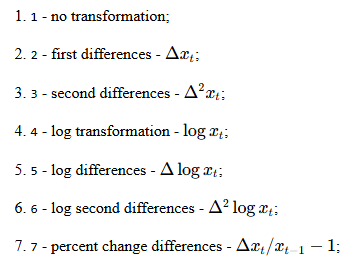

In [21]:
# transform the data
data_transform = data.copy()
transformation_code = data_transform.iloc[0, :].values.tolist()[1:]
transformation_code

[np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0),
 np.int64(5),
 np.int64(5),
 np.float64(2.0),
 np.float64(2.0),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.float64(5.0),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.int64(5),
 np.float64(5.0),
 np.float64(5.0),
 np.int64(5),
 np.int64(5),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(1.0),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(2.0),
 np.float64(6.0),
 np.float64(6.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(

In [22]:
transformer = {
    1: lambda x: x,
    2: lambda x: x.diff(),
    3: lambda x: x.diff().diff(),
    4: lambda x: np.log(x),
    5: lambda x: np.log(x).diff(),
    6: lambda x: np.log(x).diff().diff(),
    7: lambda x: x.pct_change().diff(),
}

In [23]:
data_t = data.iloc[1:, 1:].copy()
for idx, col in enumerate(data_t.columns):
    if col == "volatility":
        continue
    code = transformation_code[idx]
    data_t[col] = transformer[code](data_t[col])
data_t = data_t.dropna().reset_index(drop=True)
data_t.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,volatility
0,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,0.019397,...,0.000676,-0.001148,0.000292,-0.000022,-0.008147,0.004819,0.004929,0.004138,-0.014792,28.441518
1,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,0.006379,...,-0.000253,0.001312,0.001760,-0.000022,0.012203,-0.004890,0.012134,0.006734,0.024929,28.315402
2,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,0.020152,...,0.000657,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,0.002828,0.002020,-0.015342,27.580147
3,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,0.007453,...,0.000326,0.003334,0.001946,-0.004619,0.003992,0.004796,0.009726,0.009007,-0.012252,26.949390
4,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,0.019609,...,-0.001504,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,-0.004631,-0.001000,0.029341,27.046207


In [24]:
scaler = StandardScaler()
data_t_scaled = pd.DataFrame(scaler.fit_transform(data_t), columns=data_t.columns)
data_t_scaled

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,volatility
0,0.328457,0.800440,0.849044,-0.446349,0.236580,1.245617,0.439086,0.285976,-0.138733,0.518032,...,0.205693,-0.187291,0.184645,-0.004603,-0.916317,1.017088,0.194926,0.183318,-1.365310,-0.733842
1,0.333033,0.752109,-0.783371,1.430157,-0.261024,1.927882,1.303657,1.201996,1.341396,0.127507,...,-0.076862,0.214067,1.111780,-0.004552,1.374068,-1.031665,0.479847,0.298304,2.299850,-0.747240
2,0.272242,0.685041,1.179660,0.376523,0.203142,1.311387,0.671340,0.730704,0.311980,0.540691,...,0.200167,-0.276551,-1.179703,-0.004502,-0.459713,-1.016842,0.111847,0.089496,-1.416047,-0.825354
3,0.039936,0.096573,0.126909,-0.182315,0.284571,-0.078874,0.543121,0.497660,-0.589446,0.159711,...,0.099212,0.544024,1.229388,-1.160486,0.449850,1.012307,0.384630,0.398963,-1.130892,-0.892366
4,-0.270717,-0.519338,-0.753857,0.804830,-0.322108,-2.632201,-0.067807,0.604558,1.095884,0.524390,...,-0.457607,-0.196443,-0.008344,0.000888,-0.454134,-1.011964,-0.183121,-0.044276,2.706954,-0.882080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,-0.108892,-0.252778,0.213486,0.402620,0.476151,-0.896886,-0.945129,-0.955876,-1.093383,-1.824078,...,-0.929086,0.628117,0.025509,0.077085,0.031036,0.221364,0.129784,0.177310,-0.387409,-0.444551
785,-0.140461,-0.236903,-0.240452,-0.144337,-0.374686,0.344113,0.320054,0.492360,0.672107,1.432336,...,0.182793,-0.362594,-0.038731,-0.646826,-0.032116,-1.211368,-0.078060,-0.033921,0.132945,-0.556371
786,-0.064287,-0.279015,0.329247,0.401962,0.274180,-0.736375,-1.077685,-1.297054,-0.706865,-0.147088,...,1.741406,-0.423927,0.349632,0.961480,0.249906,0.978355,-0.093646,-0.070258,-0.151656,-0.613034
787,0.150427,0.215378,-0.178222,-0.282379,-0.005071,-0.602448,-0.811367,-0.918935,-0.254000,-0.972775,...,-0.844744,0.390262,0.361117,-0.405260,0.090706,-0.528618,-0.046679,0.085059,-0.042051,-0.650809


In [25]:
data_t_scaled["sign"] = np.where(data_t_scaled['S&P 500'] > 0, 1, 0)

In [26]:
# delete columns related to S&P 500
data_t_scaled = data_t_scaled.drop(columns=['S&P 500', 'S&P div yield', 'S&P PE ratio'])

In [27]:
data_t_scaled.to_csv("monthly_FRED-MD_2024-12_processed.csv", index=False)